# Ciclo 2 Aprendizado supervisionado Tarefa Classificação

## 1. Import Libearies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt

### 1.1 Load Dataset

In [2]:
dataset_path = '../data/train.csv'
df = pd.read_csv(dataset_path)

In [3]:
df.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar


In [4]:
df['limite_adicional'].value_counts()

Negar       7995
Conceder    1505
Name: limite_adicional, dtype: int64

In [5]:
df['limite_adicional'].value_counts(normalize=True)

Negar       0.841579
Conceder    0.158421
Name: limite_adicional, dtype: float64

In [6]:
df.loc[:, 'limite_adicional'].unique()

array(['Negar', 'Conceder'], dtype=object)

## 2. Seleção de Features

In [7]:
df.columns

Index(['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'limite_adicional'],
      dtype='object')

In [8]:
# x = feature_treianmento
# y = label

feature =['idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']

label = ['limite_adicional']

x_train = df[feature]
y_train = df['limite_adicional']

## 3. Treinamento

In [9]:
k = 7
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [10]:
y_pred = knn_classifier.predict(x_train)
y_pred

array(['Negar', 'Negar', 'Negar', ..., 'Negar', 'Negar', 'Negar'],
      dtype=object)

In [11]:
df_result = df.copy()
df_result['classificação'] = y_pred

In [14]:
mt.confusion_matrix(y_train, y_pred)

array([[ 369, 1136],
       [ 203, 7792]])

In [15]:
mt.confusion_matrix(y_train, y_pred, labels=['Negar', 'Conceder'])

array([[7792,  203],
       [1136,  369]])

In [13]:
df_result[['id_cliente', 'idade','limite_adicional','classificação']].sample(20)

,id_cliente,idade,limite_adicional,classificação
4007,8856,32,Negar,Negar
8838,3948,50,Negar,Negar
7133,5988,32,Negar,Negar
2955,2200,34,Negar,Negar
2668,11221,20,Negar,Negar
4449,5479,56,Negar,Negar
1281,8177,47,Negar,Negar
1763,428,31,Negar,Negar
1072,1237,36,Negar,Negar
5039,8714,42,Conceder,Negar


## 4.0 Performance

#### 4.1 Matriz de confusão

In [14]:
df_result[['id_cliente', 'idade','limite_adicional','classificação']].sample(20)

,id_cliente,idade,limite_adicional,classificação
7445,710,39,Negar,Negar
7805,10069,58,Conceder,Negar
128,3018,46,Negar,Negar
4962,3946,32,Negar,Negar
1282,4509,48,Negar,Negar
1995,1161,41,Negar,Negar
6349,5423,19,Negar,Negar
381,3012,36,Negar,Negar
2942,12286,35,Negar,Negar
4104,1360,49,Negar,Negar


In [15]:
mt.confusion_matrix(y_train, y_pred)

array([[ 369, 1136],
       [ 203, 7792]])

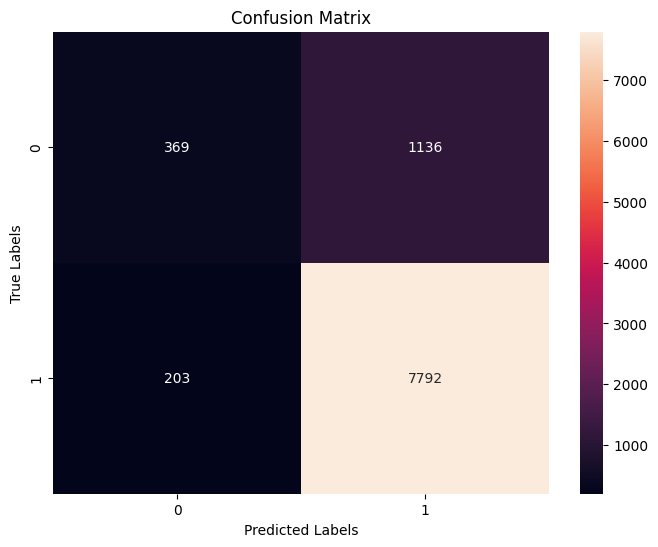

In [16]:
cm = mt.confusion_matrix(y_train, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### 4.2 Acurracy

#### $$ Acurracy = \frac {TP + TN}{P+N}$$

In [17]:
df_result['acertos'] = df_result.loc[:, ['id_cliente','limite_adicional','classificação']].apply(lambda x : 1 if x['limite_adicional'] == x['classificação'] else 0, axis=1)

In [18]:
df_result[['id_cliente', 'idade','limite_adicional','classificação', 'acertos']].sample(20)

,id_cliente,idade,limite_adicional,classificação,acertos
2831,6162,21,Negar,Negar,1
1048,3577,32,Negar,Negar,1
8701,3409,30,Negar,Negar,1
7893,8398,23,Conceder,Negar,0
2052,9024,22,Negar,Negar,1
4220,11124,746,Negar,Negar,1
3444,739,53,Conceder,Negar,0
2571,6260,26,Negar,Negar,1
1228,4949,18,Negar,Negar,1
4496,7384,36,Negar,Negar,1


In [19]:
df_result.shape

(9500, 19)

In [20]:
round(8161 / 9500 *100,2)

85.91

In [21]:
df_result['acertos'].sum()

8161

In [22]:
round(mt.accuracy_score(y_train,y_pred),2)

0.86

##### 4.3 Precision


#### $$ Precisão = \frac {TP}{TP+FP}$$

In [23]:
mt.precision_score(y_true=y_train,y_pred=y_pred, pos_label='Conceder' )

0.6451048951048951

In [24]:
mt.precision_score(y_true=y_train,y_pred=y_pred, pos_label='Negar' )

0.8727598566308243

##### 4.4 Recall

#### $$ Precisão = \frac {TP}{TP+FN}$$

In [25]:
mt.recall_score( y_train, y_pred, pos_label='Conceder' )

0.24518272425249169

In [26]:
mt.recall_score( y_train, y_pred, pos_label='Negar' )

0.9746091307066916

##### 4.5 F1


#### $$ F1 = \frac {Precision * Recall}{Precision + Recall}$$

O F1 Score varia de 0 a 1, onde:

F1 Score = 1: Modelo perfeito que possui tanto alta precisão quanto recall.

F1 Score = 0: Modelo com baixo desempenho, seja na precisão ou no recall.

In [27]:
mt.f1_score( y_train, y_pred, pos_label='Conceder' )

0.3553201733269138

In [28]:
mt.f1_score( y_train, y_pred, pos_label='Negar' )

0.9208769130768775

## 5.0 Treinando uma arvore

In [29]:
feature =['idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']

label = ['limite_adicional']

X = df[feature]
y = df[label]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [31]:
X_train.shape

(1900, 13)

In [32]:
y_train.shape

(1900, 1)

In [33]:
#tree = DecisionTreeClassifier(max_depth=10)
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [34]:
export_graphviz(
    tree,
    out_file='tree.dot',
    feature_names=x_train.columns,
    class_names=y_train['limite_adicional'].unique(),
    rounded=True,
    filled=True
)

In [35]:
!dot -Tpng tree.dot -o tree.png

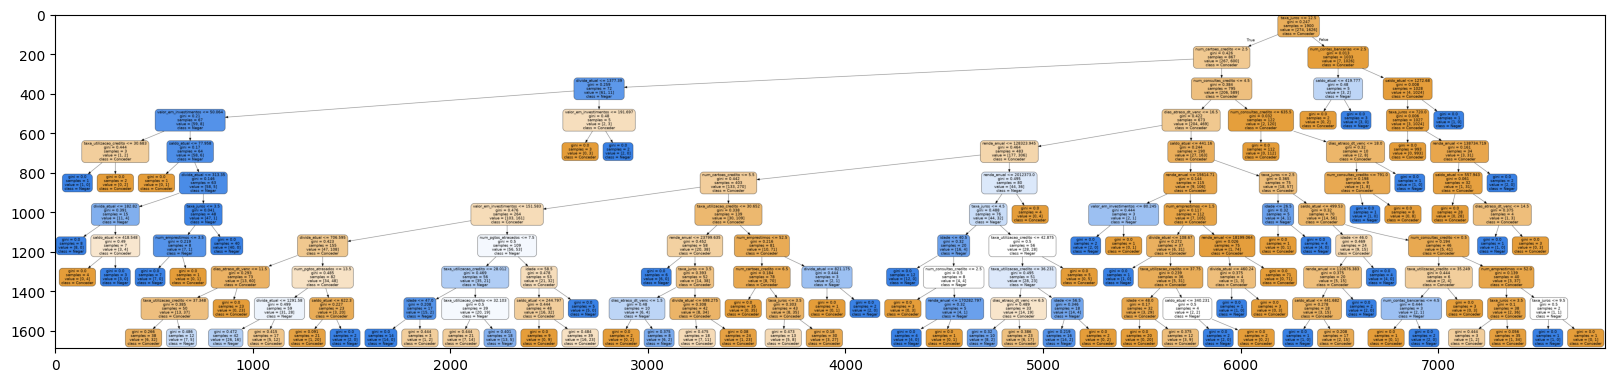

In [36]:
img = cv2.imread('tree.png')
plt.figure( figsize= (20,20) )
plt.imshow(img)

In [37]:
etree = ExtraTreeClassifier(max_depth=10)
etree.fit(X_train, y_train)

ExtraTreeClassifier(max_depth=10)

In [38]:
export_graphviz(
    etree,
    out_file='etree.dot',
    feature_names=x_train.columns,
    class_names=y_train['limite_adicional'].unique(),
    rounded=True,
    filled=True
)

In [39]:
!dot -Tpng etree.dot -o etree.png

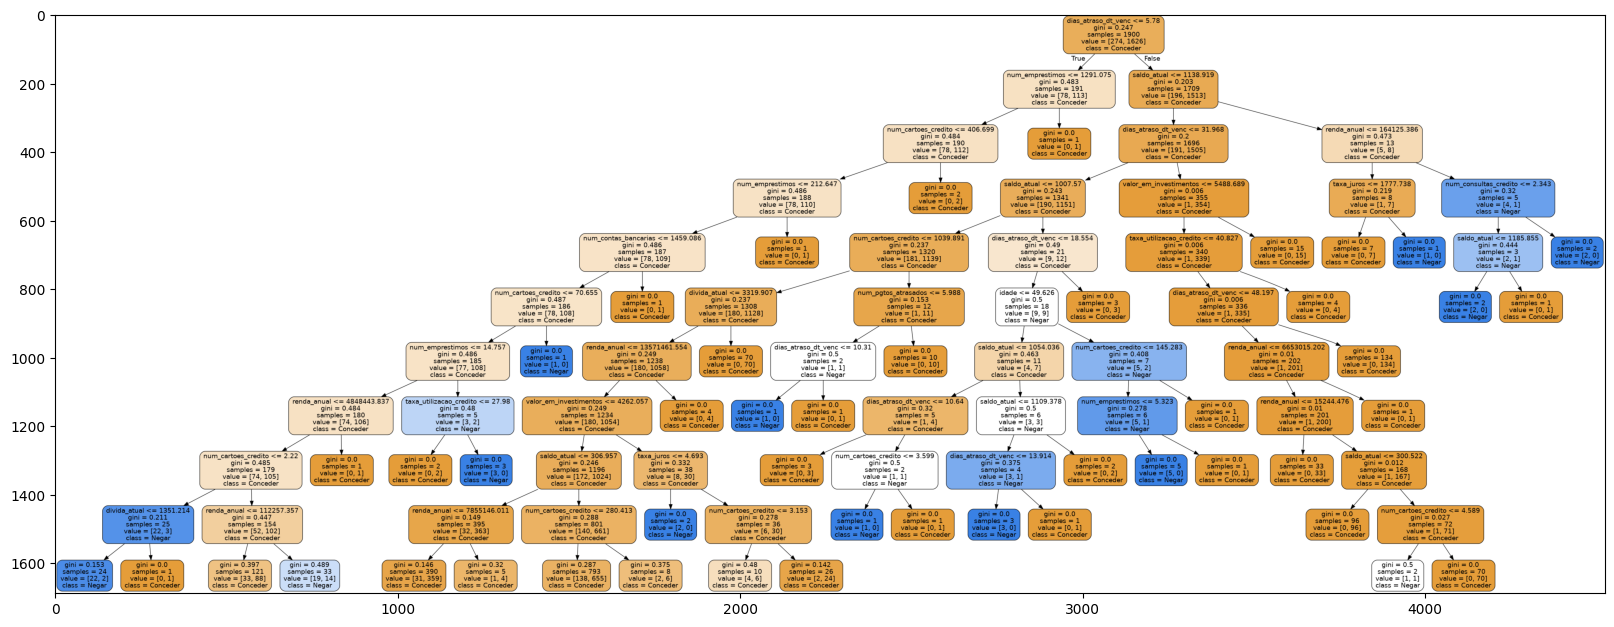

In [40]:
img = cv2.imread('etree.png')
plt.figure( figsize= (20,20) )
plt.imshow(img)

In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(mt.classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

    Conceder       0.31      0.18      0.23      1231
       Negar       0.85      0.92      0.89      6369

    accuracy                           0.80      7600
   macro avg       0.58      0.55      0.56      7600
weighted avg       0.77      0.80      0.78      7600



In [42]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(mt.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Conceder       0.51      0.46      0.49      1231
       Negar       0.90      0.91      0.91      6369

    accuracy                           0.84      7600
   macro avg       0.70      0.69      0.70      7600
weighted avg       0.84      0.84      0.84      7600



In [43]:
etree = ExtraTreeClassifier()
etree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(mt.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Conceder       0.51      0.46      0.49      1231
       Negar       0.90      0.91      0.91      6369

    accuracy                           0.84      7600
   macro avg       0.70      0.69      0.70      7600
weighted avg       0.84      0.84      0.84      7600

